Python code for generating figures used in the paper "Composite Bulges -- II. Classical Bulges and Nuclear Disks in Barred Galaxies: The Contrasting Cases of NGC 4608 and NGC 4643" (Erwin et al. 2020, submitted)

Note that many of the final figures were assembled in Adobe Illustrator out of individual plots and images (and
then saved as PDF files). This notebook includes Python commands and code used to generate most of the individual
plots. The exceptions are the color JPEG images in Figure 1 (which were taken from the NASA Extragalactic Database) and the grayscale "ratio" images in Figures xxx, which were generated using IRAF and SAOImage DS9.

## Preparatory Setup

In [1]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

# kludge to fix matplotlib's font_manager bug which mistakenly ID's "Times New Roman Bold.ttf" as
# indicating a "roman" (i.e., "normal") weight
try:
    del matplotlib.font_manager.weight_dict['roman']
except KeyError:
    pass
matplotlib.font_manager._rebuild()

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
import os
import scipy.stats
from astropy.io import fits
from scipy.ndimage import median_filter

In [3]:
# CHANGE THIS TO POINT TO APPROPRIATE LOCAL DIRECTORY (DEFAULT = SAME DIRECTORY AS THIS NOTEBOOK)
baseDir = "/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/"
projDir = baseDir + "public/"
os.chdir(projDir)
#projDir = os.getcwd() + "/"
sys.path.append(projDir)
dataDir = projDir + "data/"

import plotutils as pu
print(dataDir)
print(projDir)

# CHANGE THIS TO POINT TO APPROPRIATE LOCAL DIRECTORY -- this is where PDF figures will be saved
plotDir = baseDir + "plots/"

# set the following to True in order to save the figures as PDF files
savePlots = False

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/data/
/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/


## Elements for Figure 2: NGC 4608

In [4]:
n4608irac1ss_im = fits.getdata(dataDir + "spitzer_images/n4608irac1ss_derot.fits")
n4608irac1ss_im_m5 = median_filter(n4608irac1ss_im, 5)
n4608f160w_im = fits.getdata(dataDir + "hst_images/n4608_f160w_derot.fits")
n4608f160w_im_m5 = median_filter(n4608f160w_im, 5)

#### Spitzer IRAC1 isophote contour plot

/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:192: RuntimeWarning: divide by zero encountered in log10
  imData = np.log10(imData)
/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py:192: RuntimeWarning: invalid value encountered in log10
  imData = np.log10(imData)


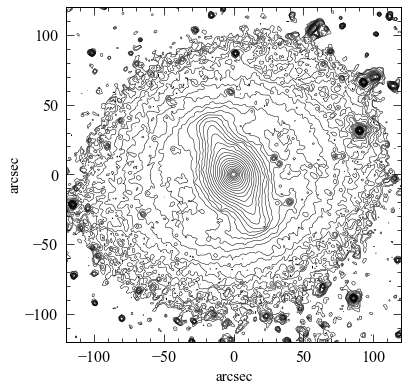

In [5]:
pu.nicecont(n4608irac1ss_im_m5, 931,1189,400, log=True,levels=np.arange(-1.6,1.5,0.1), \
pix=0.6,axisLabel='arcsec', labelSize=15)
if savePlots:
    savefig(fplots+"n4608_irac1ss_m5_cont400_240x240arcsec_mod.pdf")

#### HST WFC3-IR F160W isophote contour plots

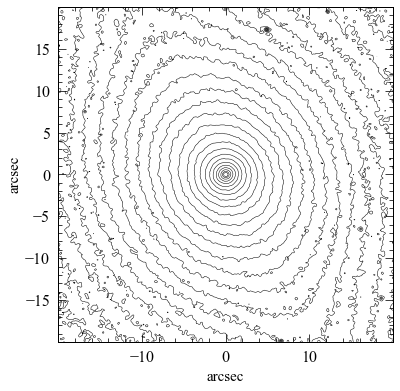

In [6]:
pu.nicecont(n4608f160w_im_m5, 1429,1344,666, log=True,levels=np.arange(2.5,4.9,0.1),\
pix=0.06,axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(fplots+"n4608f160w_cont666_40x40arcsec_mod.pdf")

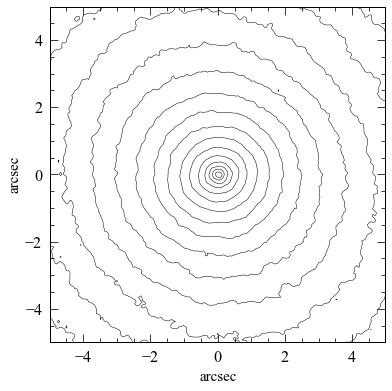

In [7]:
pu.nicecont(n4608f160w_im, 1429,1344,166, log=True,levels=np.arange(3.1,5.2,0.1),\
pix=0.06,axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(fplots+"n4608f160w_cont166_10x10arcsec_mod.pdf")

**Note:** The two $g - i$ colormaps in Figure 2 were generated using SAOImage DS9 (loaded from FITS files and then saved as JPEGs).

## Elements for Figure 3: NGC 4643

In [8]:
n4643irac1ss = fits.getdata(dataDir + "spitzer_images/n4643irac1ss.fits")
n4643irac1ss_m5 = median_filter(n4643irac1ss,5)
n4643f160w_im = fits.getdata(dataDir + "hst_images/n4643_f160w_derot.fits")
n4643f160w_im_m5 = median_filter(n4643f160w_im, 5)

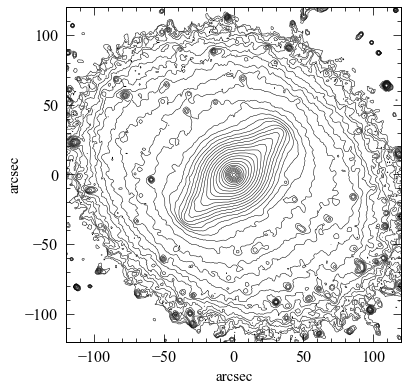

In [9]:
pu.nicecont(n4643irac1ss_m5, 446,781,320, log=True,levels=np.arange(-1.7,1.8,0.1), \
pix=0.75,axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(fplots+"n4643_irac1ss_m5_cont320_mod.pdf")

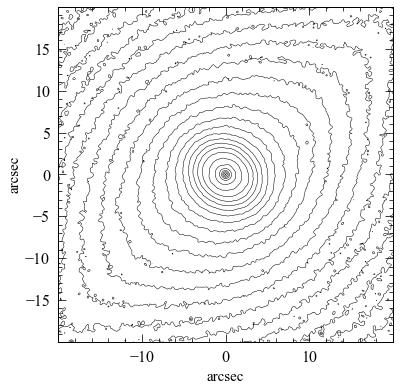

In [10]:
pu.nicecont(n4643f160w_im_m5, 1416,1484,666, log=True,levels=np.arange(2.8,5.2,0.1),pix=0.06,\
axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(fplots+"n4643f160w_cont666_40x40arcsec_mod.pdf")

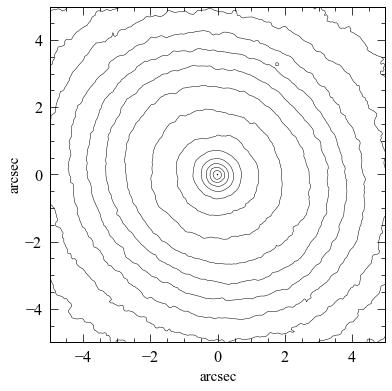

In [11]:
pu.nicecont(n4643f160w_im, 1416,1484,166, log=True,levels=np.arange(3.5,5.4,0.1),pix=0.06,\
axisLabel='arcsec',labelSize=15)
if savePlots:
    savefig(fplots+"n4643f160w_cont166_10x10arcsec_mod.pdf")

**Note:** The two $g - i$ colormaps in Figure 3 were generated using SAOImage DS9 (loaded from FITS files and then saved as JPEGs).

## Figure 4: Ellipse Fits

/Users/erwin/coding/python_scripts/ellipsefits.py:1624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(new_labels2)


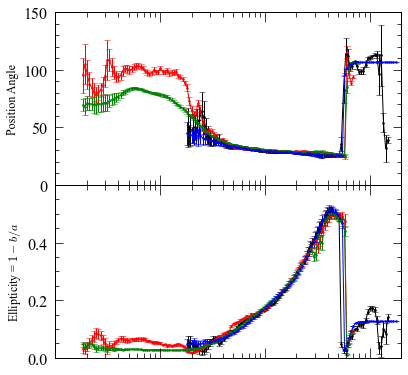

In [12]:
n4608irac1_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608irac1ss.fits",pix=0.6,telPA=119.07)
n4608irac1_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608irac1_model.fits",pix=0.6,telPA=119.07)
n4608f160w_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608f160w.fits",pix=0.06,telPA=161.63)
n4608f160w_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4608f160w_model.fits",pix=0.06,telPA=161.63)

(ax1,ax2) = ellipse.PlotEllPA([n4608irac1_efit,n4608f160w_efit, n4608f160w_model,n4608irac1_model], xlog=True, merge=True,xrange=[0.1,200], xtitle='')
ax2.set_xticklabels([])
if savePlots:
    savefig(fplots+"n4608_efits.pdf")

/Users/erwin/coding/python_scripts/ellipsefits.py:1624: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(new_labels2)


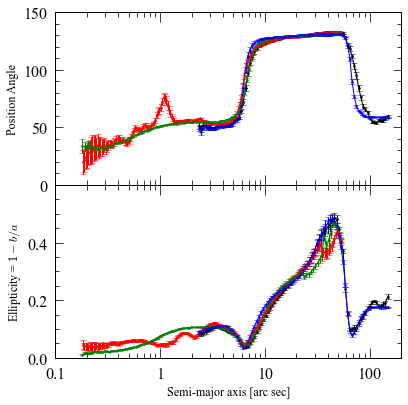

In [13]:
n4643irac1_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643irac1ss.fits",pix=0.75)
n4643irac1_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643irac1_model.fits",pix=0.75)
n4643f160w_efit = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643f160w.fits",pix=0.06,telPA=114.6)
n4643f160w_model = ellipse.ReadEllipse(dataDir + "ellipsefits/el_n4643f160w_model.fits",pix=0.06,telPA=114.6)

ellipse.PlotEllPA([n4643irac1_efit,n4643f160w_efit, n4643f160w_model,n4643irac1_model], xlog=True, merge=True,xrange=[0.1,200])                      
if savePlots:
    savefig(fplots+"n4643_efits.pdf")

## Figure 5

In [20]:
n4608irac1ss_cutout = fits.getdata(dataDir + "spitzer_images/n4608irac1ss_fitted_cutout.fits")
n4608irac1ss_cutout_m5 = median_filter(n4608irac1ss_cutout, 5)
n4608f160w_im = fits.getdata(dataDir+"hst_images/n4608_f160w_derot.fits")

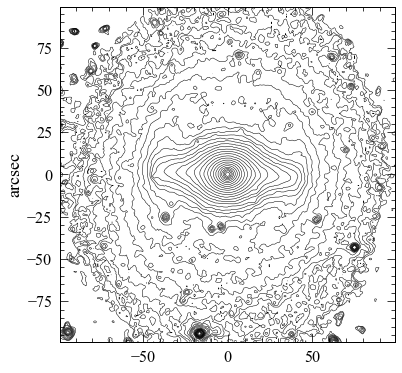

In [21]:
pu.nicecont(n4608irac1ss_cutout_m5, 166,166,330, log=True,levels=np.arange(0.8,4,0.1),\
pix=0.6,axisLabel='arcsec',printAxisLabels='y',labelSize=18)
if savePlots:
    savefig(fplots+"n4608irac1ss_fitted_cutout_square_cont.pdf")

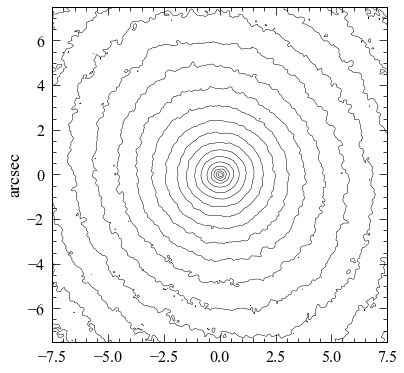

In [22]:
pu.nicecont(n4608f160w_im, 1429,1344,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
axisLabel='arcsec', printAxisLabels='y',labelSize=18)
if savePlots:
    savefig(fplots+"n4608f160w_cont250_for_multiresiduals.pdf")

### Grayscale Data/Model Ratio Images

The grayscale resiedual-ratio images (panels b-e, g, and h) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.

To generate the model images, one can use the Imfit `makeimage` program and the best-fit parameter files (along with the appropriate PSF image files, with the original data image used to specify the output image size):

    $ makeimage bestfit_params_n4608irac1.dat -o model_irac1.fits --refimage=n4608irac1ss_adu.fits --psf=psf_irac1_0.6arcsec_51.fits

    $ makeimage bestfit_params_n4608f160w.dat -o model_f160w.fits --refimage=n4608_f160w.fits --psf=psf_f160w.fits

One can then make the residual-ratio images in Python. The following code shows how to do this for the "IRAC1 Final Model" (panel e) and "Final Model" (panel h).

    >>> data_im = fits.getdata(dataDir + "spitzer_images/n4608irac1ss_adu.fits")
    >>> model_im = fits.getdata("/path/to/model_irac1.fits")
    >>> irac1_residual_ratio_im = (data_im - model_im) / data_im
    >>> data_im = fits.getdata(dataDir + "hst_images/n4608_f160w.fits")
    >>> model_im = fits.getdata("/path/to/model_f160w.fits")
    >>> f160w_residual_ratio_im = (data_im - model_im) / data_im

## Figure 6

In [31]:
n4608irac1ss_im = fits.getdata(dataDir+"spitzer_images/n4608irac1ss_adu_derot.fits")
n4608irac1ss_im_m5 = median_filter(n4608irac1ss_im, 5)
model_irac1 = fits.getdata(dataDir + "model_images/n4608irac1_model_derot.fits")
model_irac1_m5 = median_filter(model_irac1, 5)

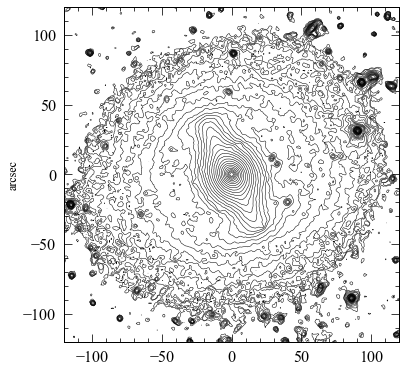

In [32]:
pu.nicecont(n4608irac1ss_im_m5, 931,1189,400, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(fplots+"n4608_irac1ss_m5_cont400_240x240arcsec.pdf")

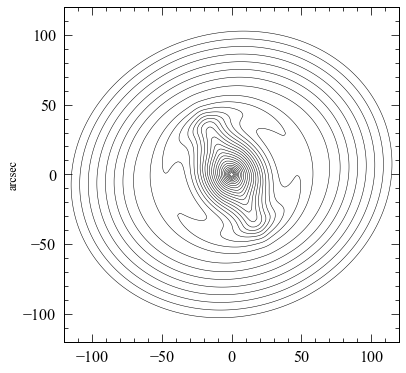

In [33]:
pu.nicecont(model_irac1_m5, 931,1189,400, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(fplots+"n4608_irac1ss_model4b_240x240arcsec.pdf")

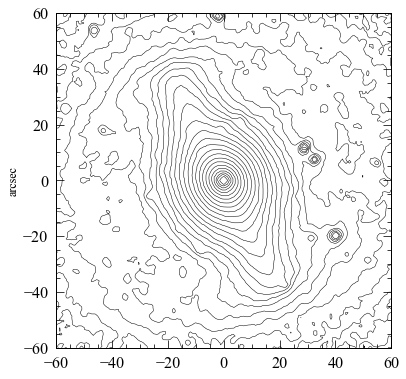

In [34]:
pu.nicecont(n4608irac1ss_im_m5, 931,1189,200, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(fplots+"n4608_irac1ss_m5_cont400_120x120arcsec.pdf")

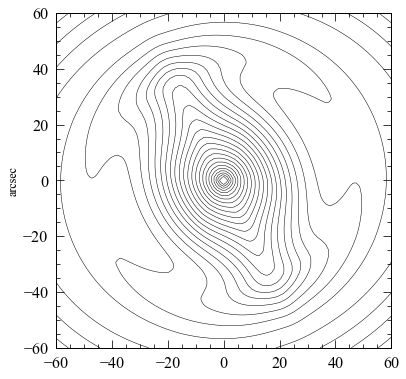

In [36]:
pu.nicecont(model_irac1_m5, 931,1189,200, log=True,levels=np.arange(0.7,4.0,0.1), pix=0.6,printAxisLabels='y',axisLabel='arcsec')
if savePlots:
    savefig(fplots+"n4608_irac1ss_model4b_120x120arcsec.pdf")

In [44]:
reload(pu)

<module 'plotutils' from '/Users/erwin/Documents/Working/Papers/Papers-CompositeBulges/Paper-n4608-n4643/public/plotutils.py'>

<ipython-input-45-d2831d540b8f>:1: RuntimeWarning: divide by zero encountered in true_divide
  imratio_smooth = n4608irac1ss_im_m5 / model_irac1_m5
<ipython-input-45-d2831d540b8f>:1: RuntimeWarning: invalid value encountered in true_divide
  imratio_smooth = n4608irac1ss_im_m5 / model_irac1_m5
<ipython-input-45-d2831d540b8f>:2: RuntimeWarning: divide by zero encountered in true_divide
  imratio = n4608irac1ss_im / model_irac1
<ipython-input-45-d2831d540b8f>:2: RuntimeWarning: invalid value encountered in true_divide
  imratio = n4608irac1ss_im / model_irac1


   pu.ExtractCenteredSubimage: extracting imData[y1:y2,x1:x2] = imData[988:1389,730:1131]


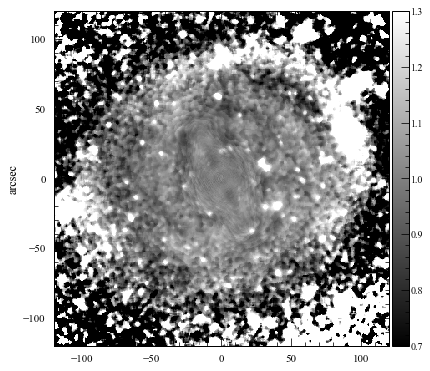

In [45]:
imratio_smooth = n4608irac1ss_im_m5 / model_irac1_m5
imratio = n4608irac1ss_im / model_irac1
pu.PlotImage(imratio_smooth, 931,1189,400, zrange=[0.7,1.3],cmap='gray', pix=0.6, axisLabel='arcsec', printAxisLabels='y', colorbarLabel=None)
if savePlots:
    savefig(fplots+"n4608_irac1ss_residual-ratio_240x240arcsec.pdf")

   pu.ExtractCenteredSubimage: extracting imData[y1:y2,x1:x2] = imData[1088:1289,830:1031]


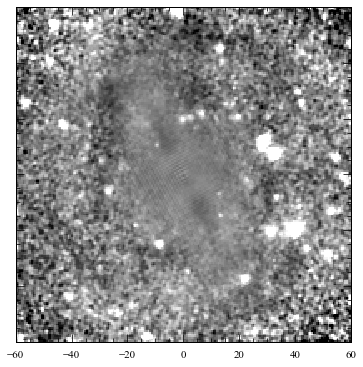

In [47]:
pu.PlotImage(imratio, 931,1189,200, zrange=[0.7,1.3],cmap='gray', pix=0.6, axisLabel='arcsec', printAxisLabels=None, colorbar=False)
# suppress y-axis tick labels
ax = plt.gca()
ax.set_yticklabels([])
if savePlots:
    savefig(fplots+"n4608_irac1ss_residual-ratio_120x120arcsec.pdf")

## Figure 7

The grayscale data/model ratio images (bottom two panels) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.

## Figure 8

In [26]:
n4643irac1ss_cutout = fits.getdata(dataDir + "spitzer_images/n4643irac1ss_fitted_cutout.fits")
n4643irac1ss_cutout_m3 = median_filter(n4643irac1ss_cutout, 3)
n4643f160w_im = fits.getdata(dataDir+"hst_images/n4643_f160w_derot.fits")

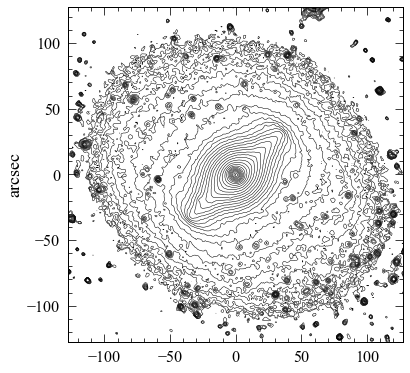

In [27]:
pu.nicecont(n4643irac1ss_cutout_m3, 247,232,340, log=True, levels=np.arange(2,5.5,0.1),\
pix=0.75,axisLabel='arcsec',printAxisLabels='y', labelSize=18)
if savePlots:
    savefig(fplots+"n4643irac1ss_fitted_cutout_square_cont.pdf")

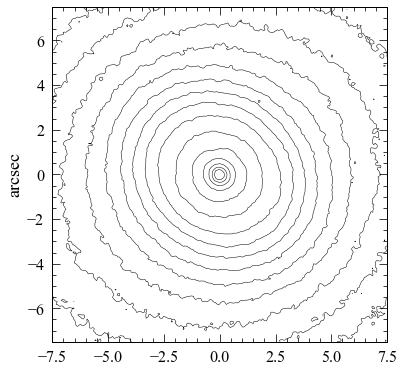

In [28]:
pu.nicecont(n4643f160w_im, 1416,1484,250, log=True,levels=np.arange(2.5,5.2,0.1),pix=0.06,\
printAxisLabels='y',axisLabel='arcsec', labelSize=18)
if savePlots:
    savefig(fplots+"n4643f160w_cont250_for_multiresiduals.pdf")

### Grayscale Data/Model Ratio Images

The grayscale resiedual-ratio images (panels b-e, g, and h) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.

To generate the model images, one can use the Imfit `makeimage` program and the best-fit parameter files (along with the appropriate PSF image files, with the original data image used to specify the output image size):

    $ makeimage bestfit_params_n4643irac1.dat -o model_irac1.fits --refimage=n4643irac1ss_adu.fits --psf=psf_irac1_0.6arcsec_51.fits

    $ makeimage bestfit_params_n4643f160w.dat -o model_f160w.fits --refimage=n4643_f160w.fits --psf=psf_f160w.fits


One can then make the residual-ratio images in Python. The following code shows how to do this for the "IRAC1 Final Model" (panel e) and "Final Model" (panel h).

    >>> data_im = fits.getdata(dataDir + "spitzer_images/n4643irac1ss_adu.fits")
    >>> model_im = fits.getdata("/path/to/model_irac1.fits")
    >>> irac1_residual_ratio_im = (data_im - model_im) / data_im
    >>> data_im = fits.getdata(dataDir + "hst_images/n4643_f160w.fits")
    >>> model_im = fits.getdata("/path/to/model_f160w.fits")
    >>> f160w_residual_ratio_im = (data_im - model_im) / data_im

## Figure 9

The grayscale data/model ratio images (bottom two panels) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.

## Figure 10

The grayscale data/model ratio images (panels b-e, g, and h) were generated in IRAF using the `imarith` command, 
and were then displayed in SAOImage DS9 with a linear grayscale stretch (from 0.7 to 1.3) and saved as JPEG images.